# Airline Passenger Satisfaction, Prediction and Analysis

This dataset contains an airline passenger satisfaction survey. The factors that are highly correlated to a satisfied (or dissatisfied) passenger and prediction of passenger satisfaction is acheived through this dataset.

## Data

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.express as px
%matplotlib inline

## Reading Dataset

### Training Set

In [5]:
df_train = pd.read_csv(r"/content/drive/MyDrive/train.csv")

## About the Data

In [6]:
df_train.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
65598,65598,58547,Male,Loyal Customer,41,Business travel,Business,1514,4,4,...,4,4,4,4,4,4,4,31,27.0,satisfied
48956,48956,98610,Female,disloyal Customer,32,Business travel,Business,873,1,1,...,2,3,2,5,3,4,2,13,0.0,neutral or dissatisfied
58597,58597,126859,Male,Loyal Customer,17,Personal Travel,Eco,2296,3,5,...,2,3,4,5,3,4,2,0,0.0,neutral or dissatisfied
64285,64285,118209,Female,Loyal Customer,51,Business travel,Business,1444,4,4,...,5,5,5,5,4,5,5,0,0.0,satisfied
82616,82616,16435,Male,Loyal Customer,66,Business travel,Business,3919,2,5,...,2,2,2,2,2,2,3,19,16.0,neutral or dissatisfied


In [7]:
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [9]:
df_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
df_train.shape

(103904, 25)

## Data Preprocessing

### Null Values

In [11]:
df_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

#### Displaying Rows with Null Values

In [12]:
df_train[df_train.isna().any(axis=1)]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,...,5,1,5,5,5,3,5,0,NaN,satisfied


#### Filling Null Values

In [13]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_train[['Arrival Delay in Minutes']])
df_train['Arrival Delay in Minutes'] = imp.transform(df_train[['Arrival Delay in Minutes']])
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


#### Checking for Null Values

In [14]:
df_train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Dropping Columns

In [15]:
df_train = df_train.drop('Unnamed: 0', axis=1)

### Sorting

In [16]:
df_train = df_train.sort_values('id', ascending=True)
df_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
47865,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
44425,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
96450,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
72524,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97767,129874,Female,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
53459,129875,Female,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
32973,129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
82052,129879,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,satisfied


### Duplicate Values

In [17]:
df_train.duplicated().any()

False

### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

##### 0:- Business   1:- Eco Plus  2:- Eco

In [19]:
df_train['Class']=le.fit_transform(df_train['Class'])
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,Male,disloyal Customer,48,Business travel,0,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
47865,2,Female,Loyal Customer,35,Business travel,0,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
44425,3,Male,Loyal Customer,41,Business travel,0,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
96450,4,Male,Loyal Customer,50,Business travel,0,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
72524,5,Female,Loyal Customer,49,Business travel,0,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied


##### 0:- Female  1:- Male  

In [20]:
df_train['Gender']=le.fit_transform(df_train['Gender'])
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,disloyal Customer,48,Business travel,0,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
47865,2,0,Loyal Customer,35,Business travel,0,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
44425,3,1,Loyal Customer,41,Business travel,0,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
96450,4,1,Loyal Customer,50,Business travel,0,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
72524,5,0,Loyal Customer,49,Business travel,0,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied


##### 0:- Loyal Customer  1:- Disloyal Customer

In [21]:
df_train['Customer Type']=le.fit_transform(df_train['Customer Type'])
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,1,48,Business travel,0,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
47865,2,0,0,35,Business travel,0,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
44425,3,1,0,41,Business travel,0,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
96450,4,1,0,50,Business travel,0,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
72524,5,0,0,49,Business travel,0,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied


##### 0:- Neutral or Dissatisfied  1:- Satisfied

In [22]:
df_train['satisfaction']=le.fit_transform(df_train['satisfaction'])
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,1,48,Business travel,0,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
47865,2,0,0,35,Business travel,0,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
44425,3,1,0,41,Business travel,0,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
96450,4,1,0,50,Business travel,0,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
72524,5,0,0,49,Business travel,0,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1


##### 0 -: Business Travel 1-: Personal Travel

In [23]:
df_train['Type of Travel']=le.fit_transform(df_train['Type of Travel'])
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
90131,1,1,1,48,0,0,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
47865,2,0,0,35,0,0,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
44425,3,1,0,41,0,0,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
96450,4,1,0,50,0,0,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
72524,5,0,0,49,0,0,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1


## EDA

### Visualizing Target Column

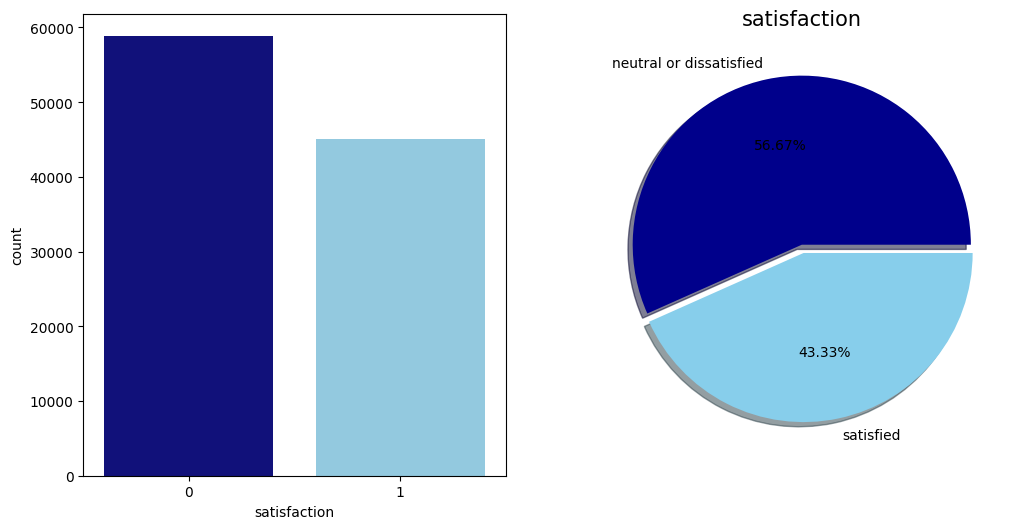

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction', data=df_train, palette=["darkblue","skyblue"])

plt.subplot(1, 2, 2)
plt.pie(df_train['satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True,colors=["darkblue","skyblue"])
plt.title('satisfaction', fontsize=15)

plt.show()

Neutral or Dissatisfied Customers have more count

### Distribution of Age

In [25]:
fig = px.histogram(df_train, x='Age', marginal='box', nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

Kids, teenagers and old-age people have less travel compared to adults

### Loyalty of Customers

In [26]:
fig = px.histogram(df_train,
x='satisfaction',
marginal='box',
color='Customer Type',
color_discrete_sequence=['green', 'grey'],
title='Visualization')
fig.update_layout(bargap=0.1)
fig.show()

Disloyal Customers have less satisfaction count

### Visualizing Features

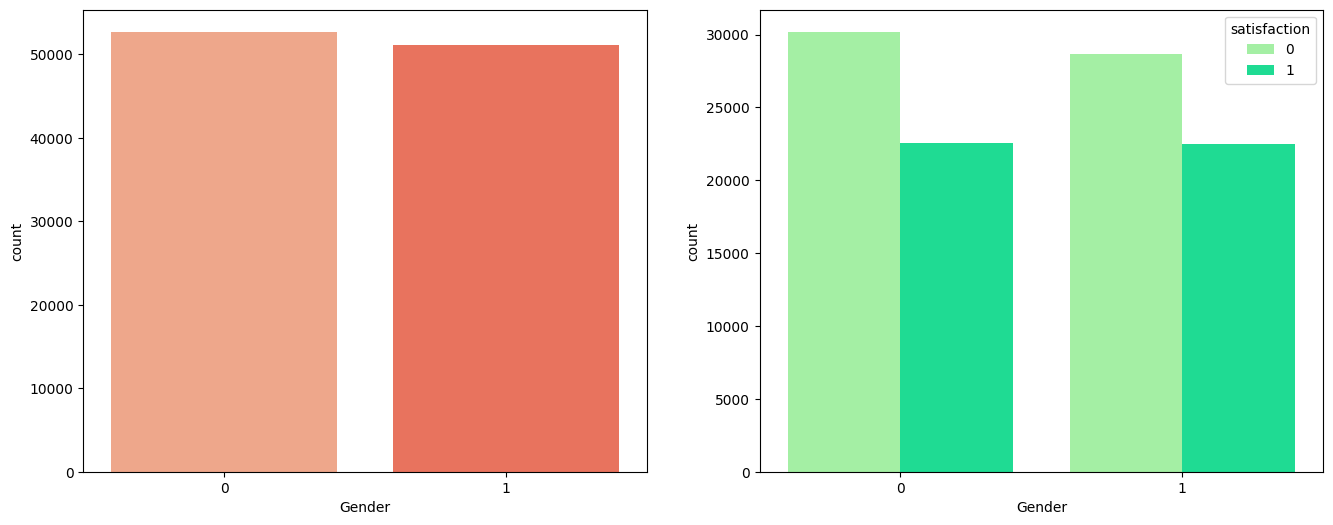

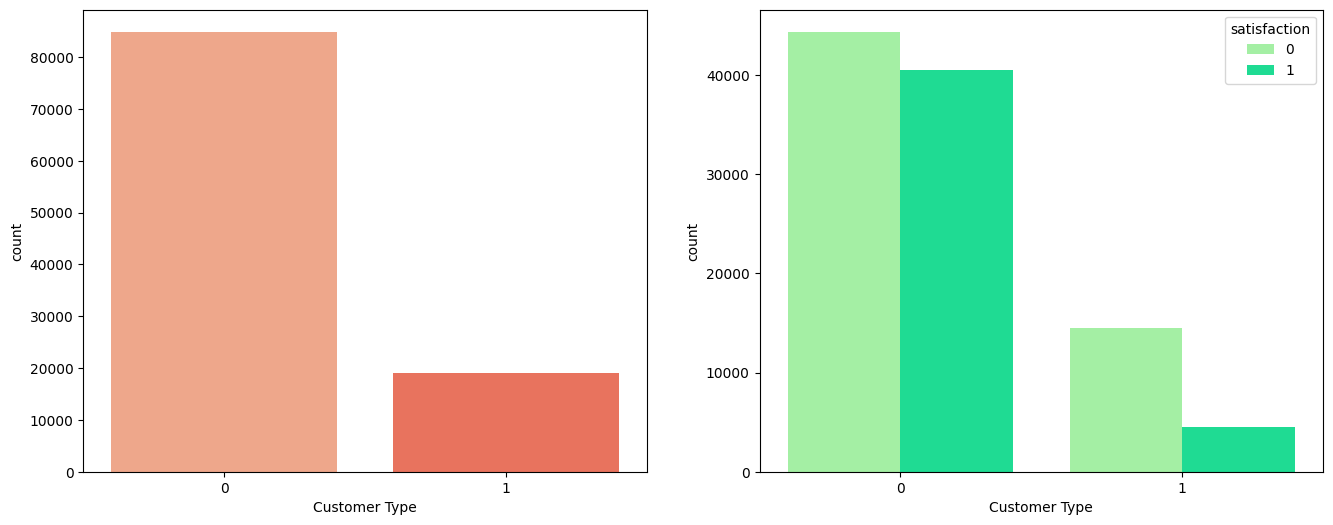

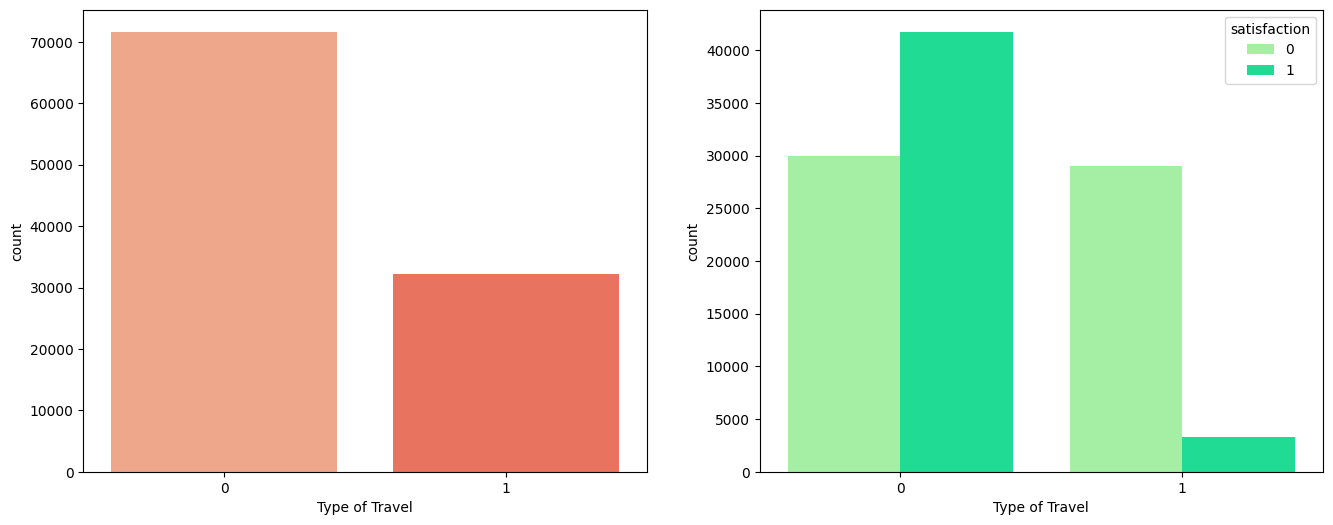

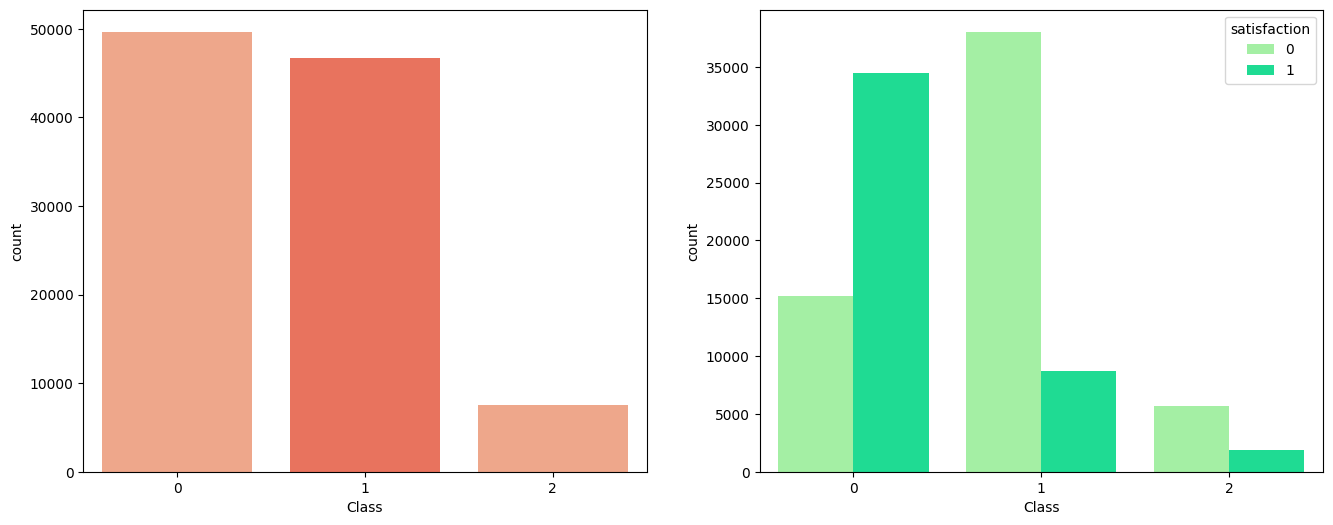

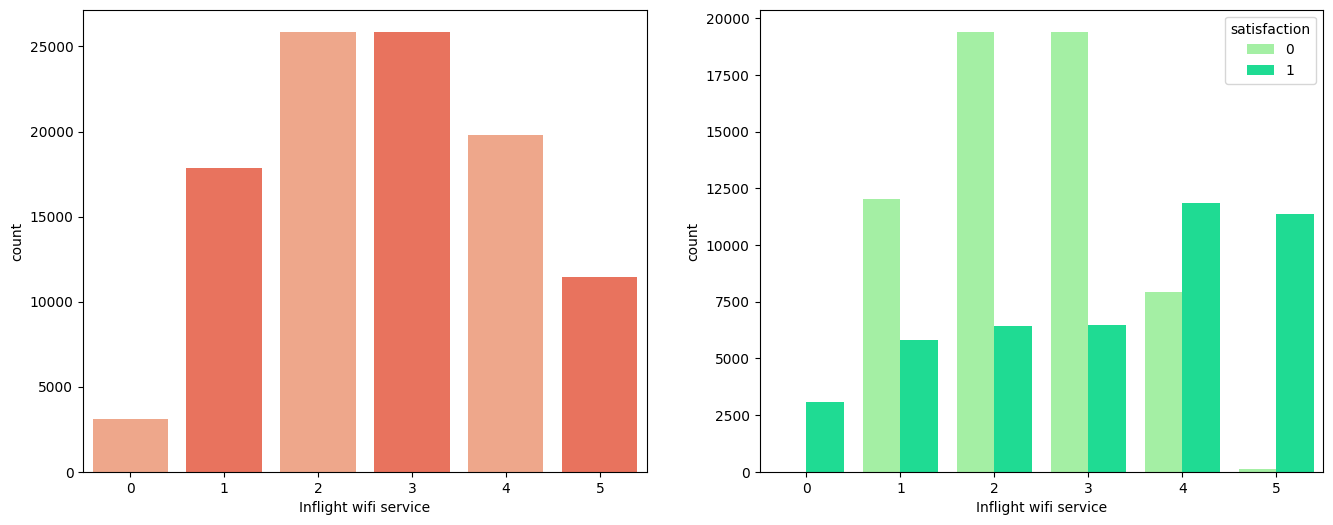

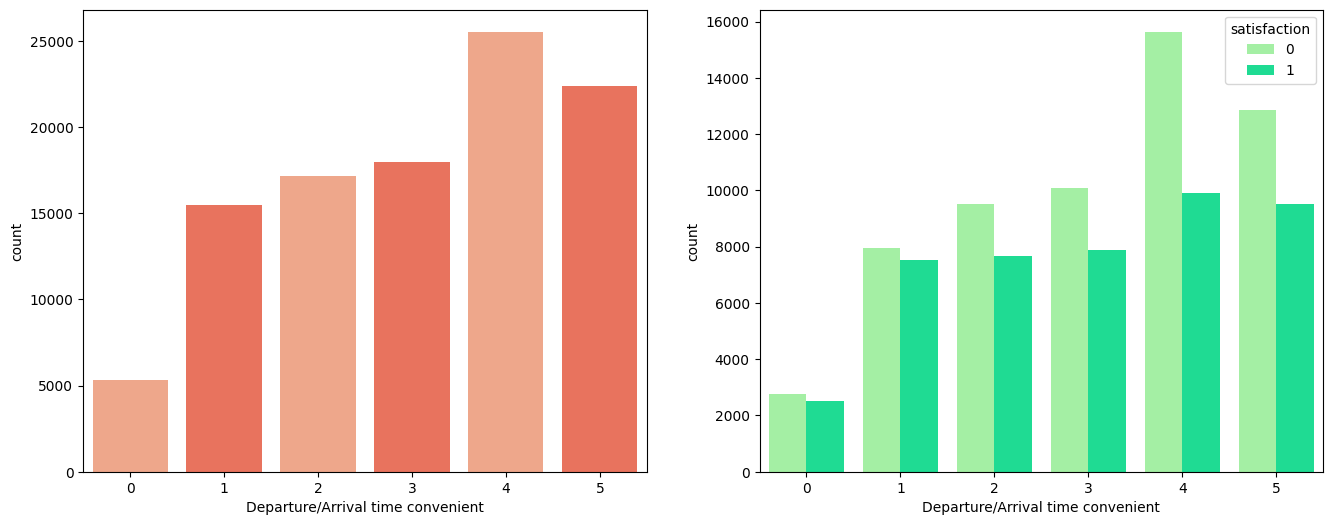

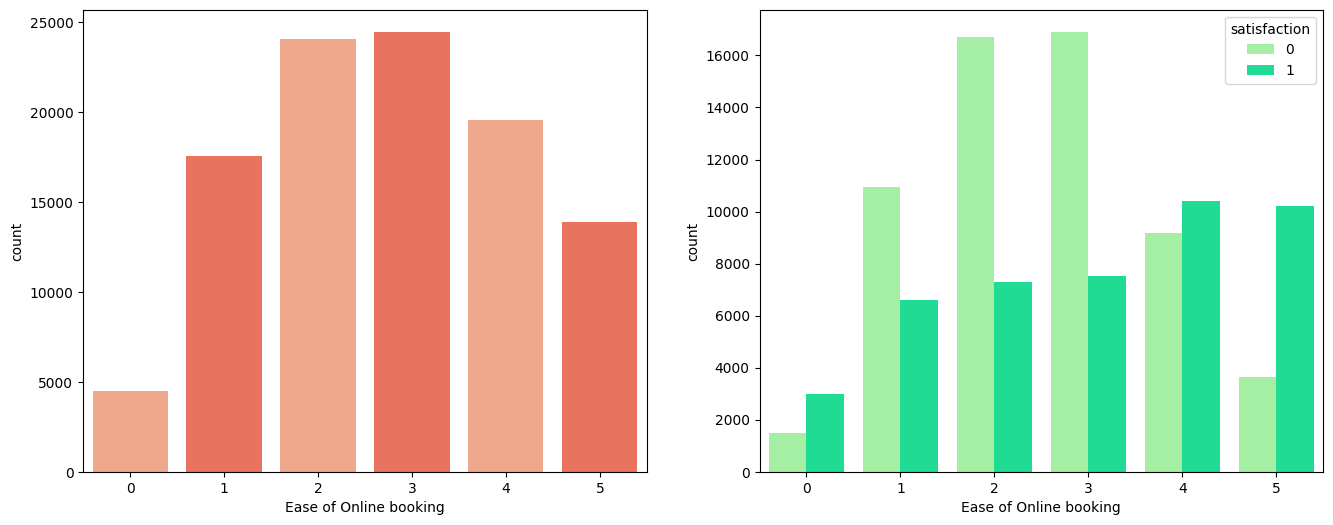

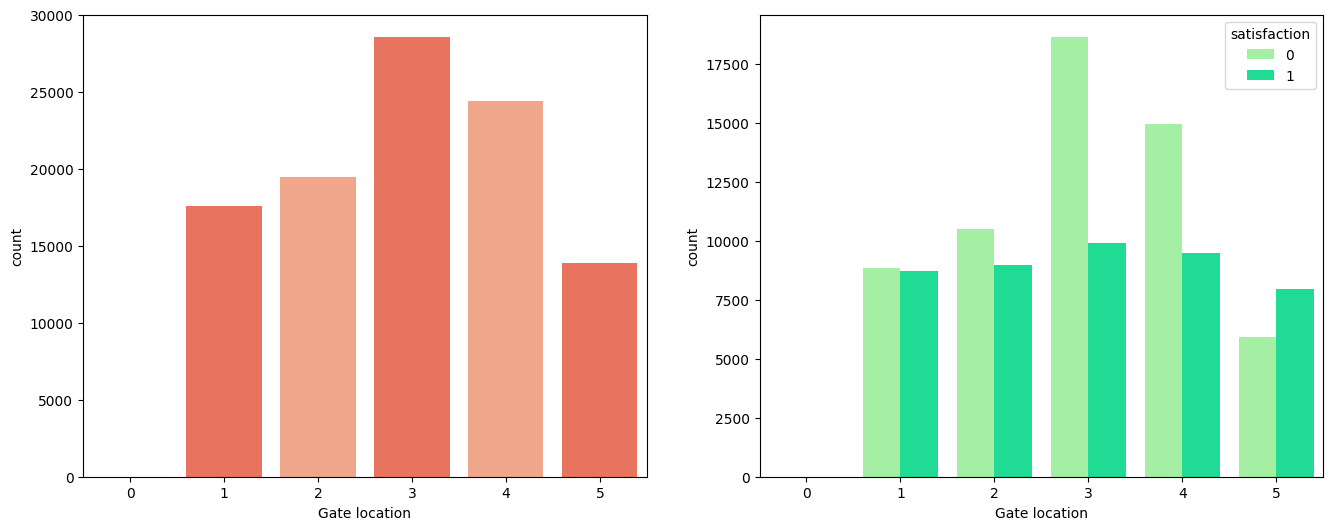

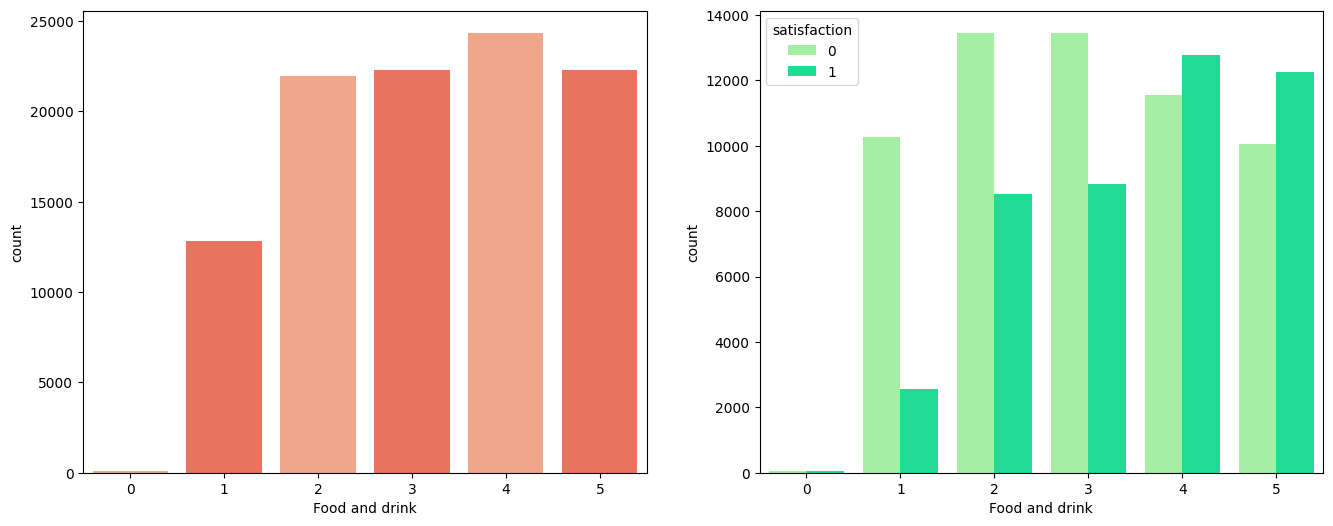

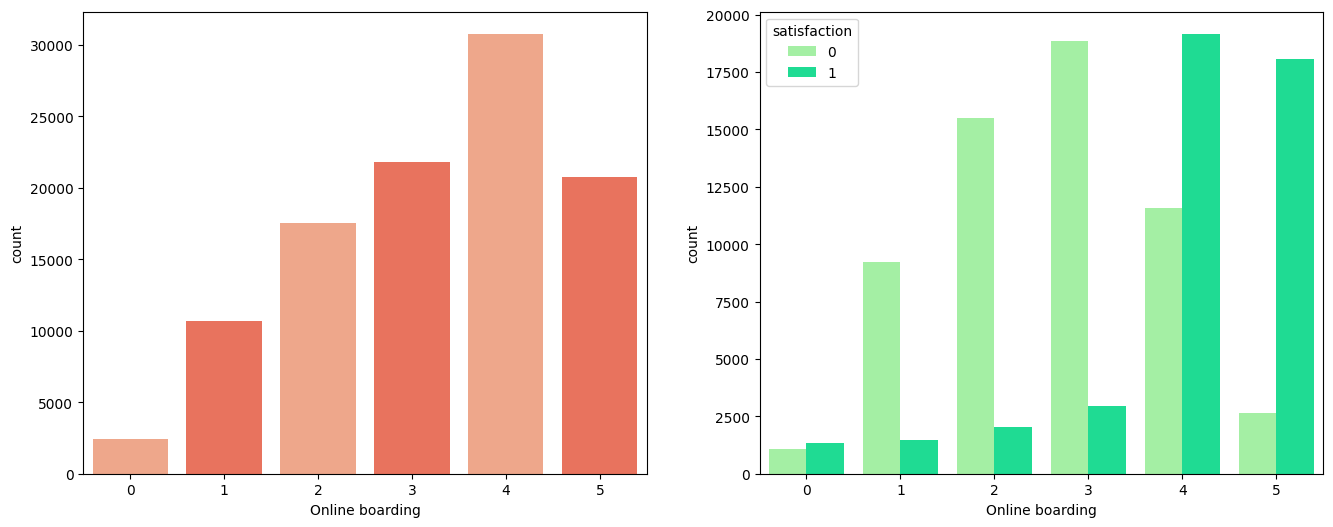

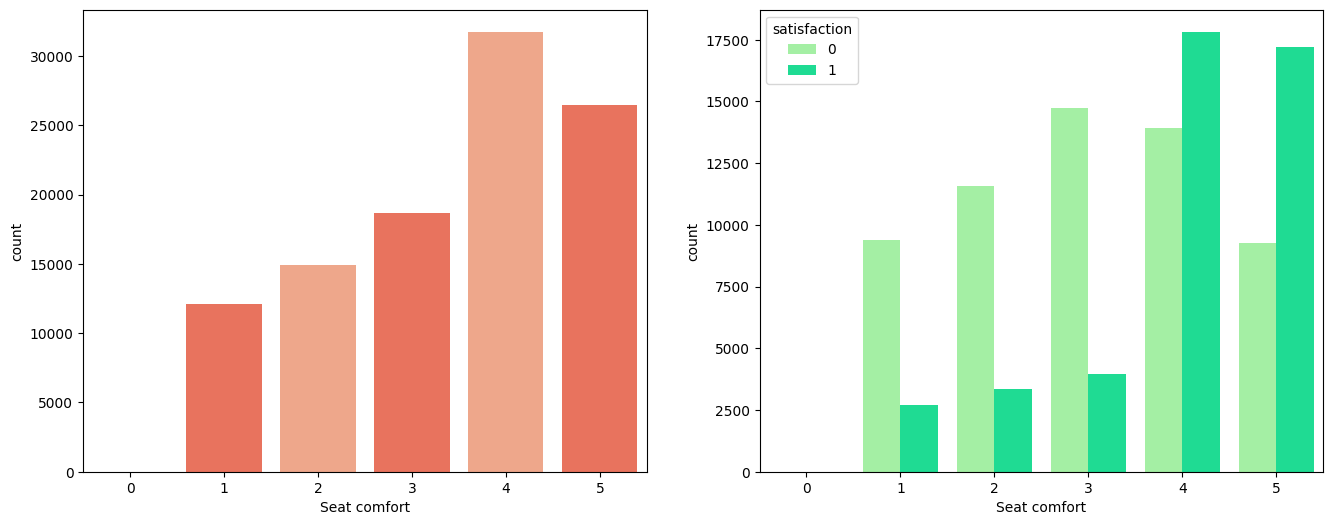

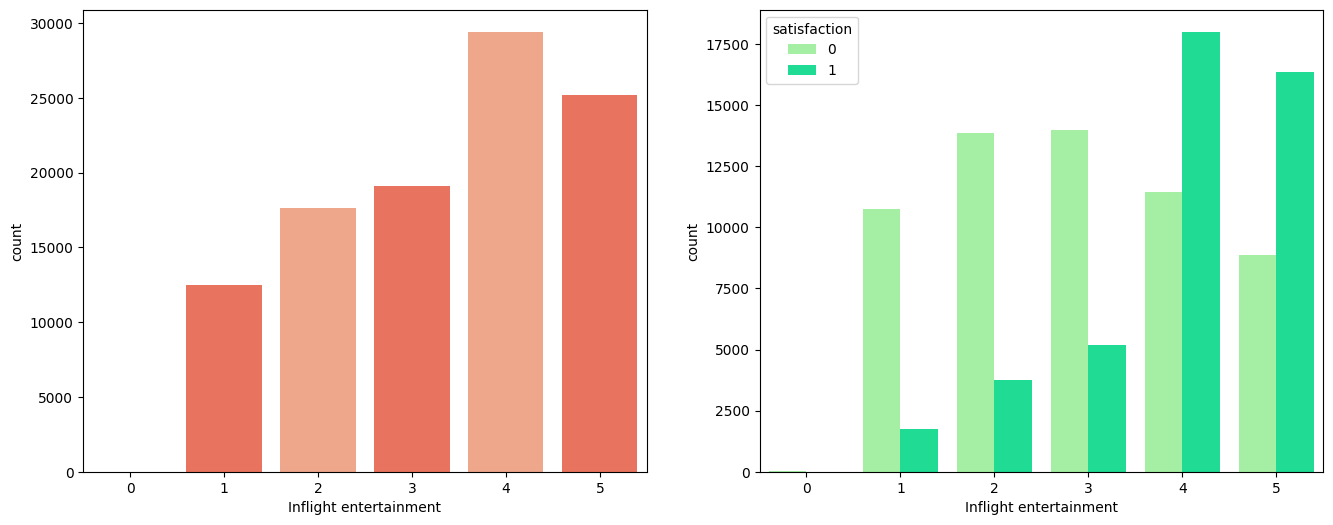

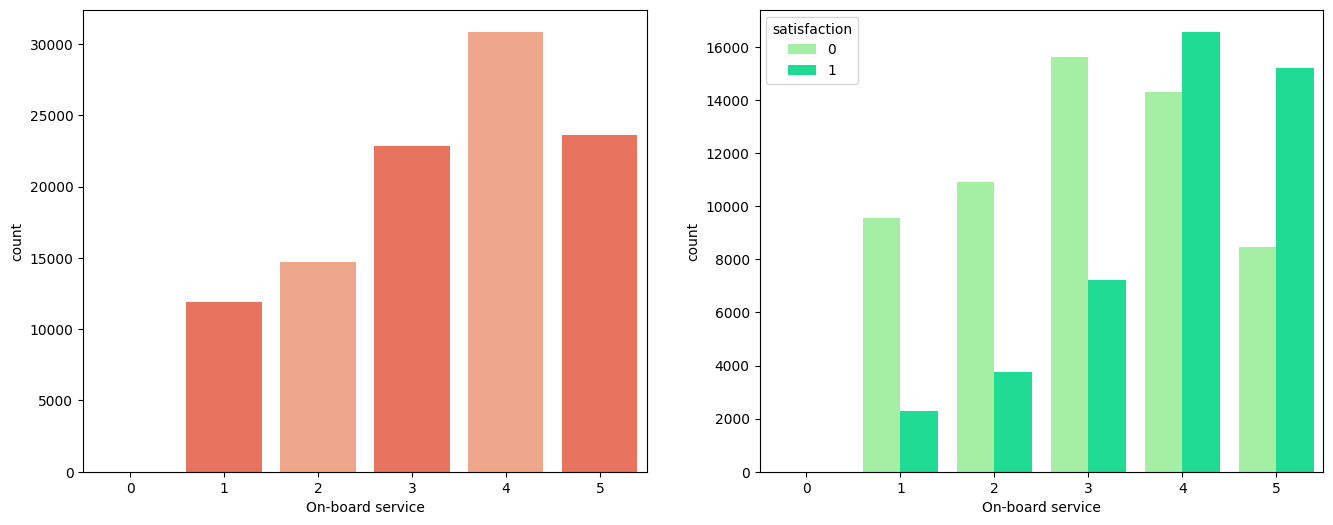

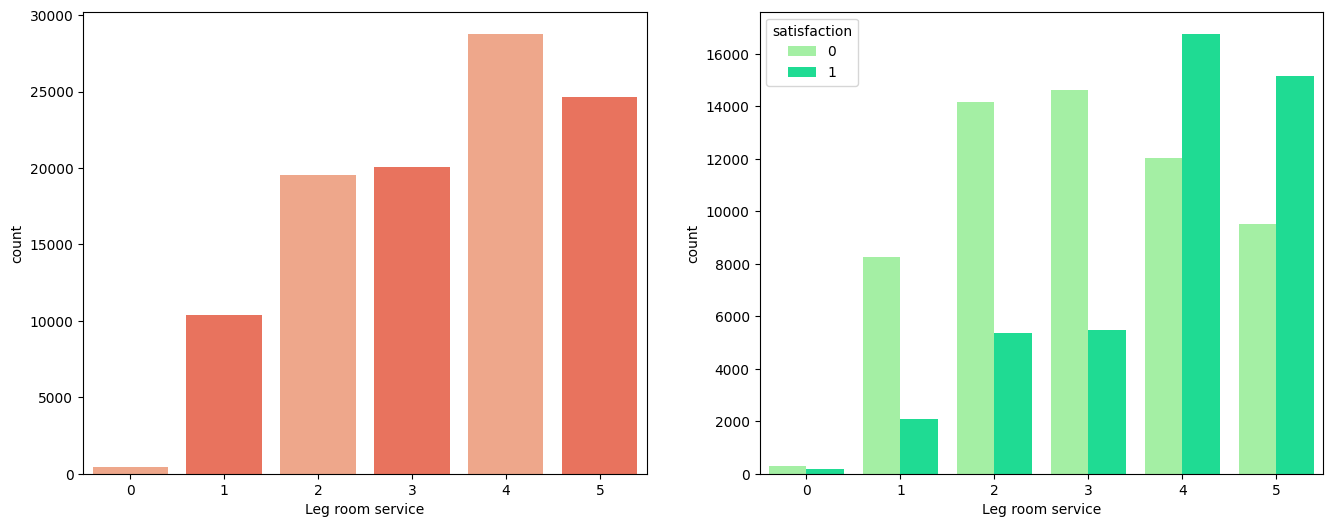

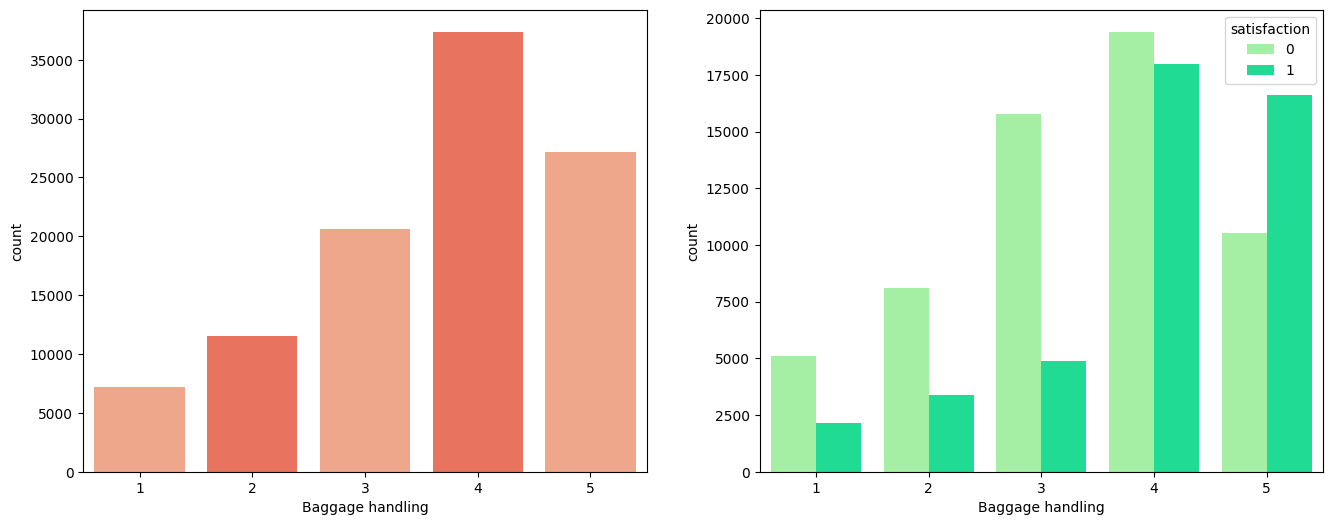

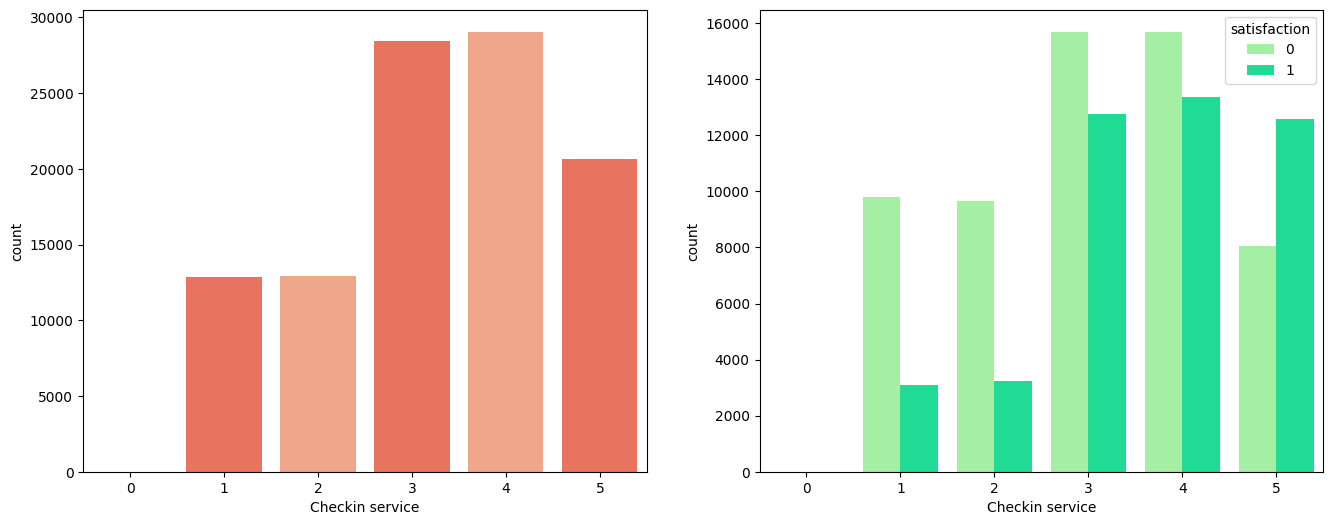

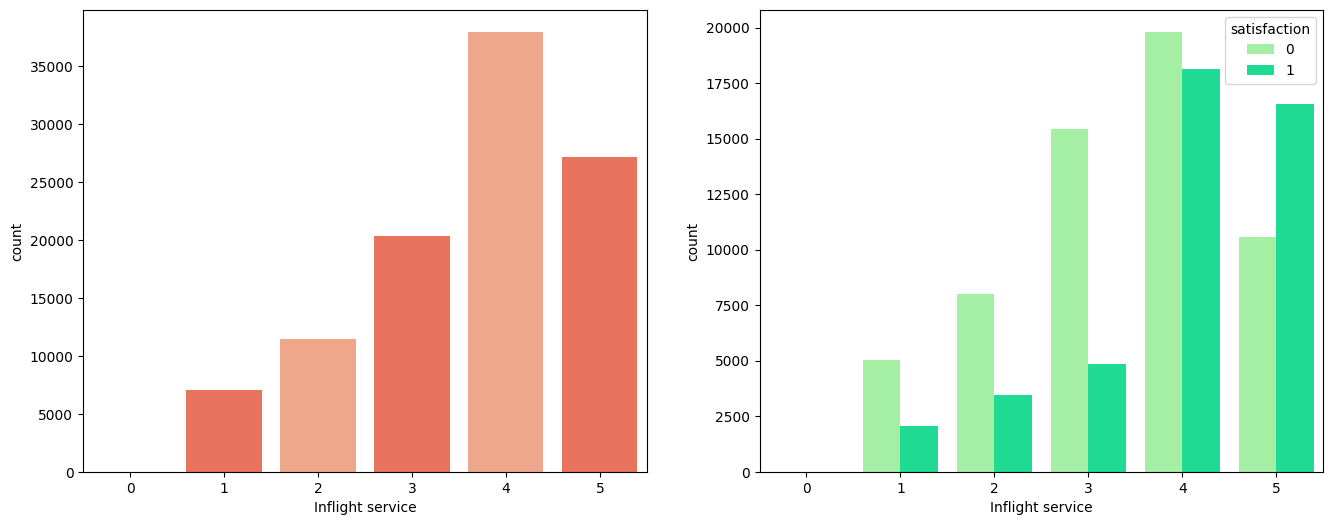

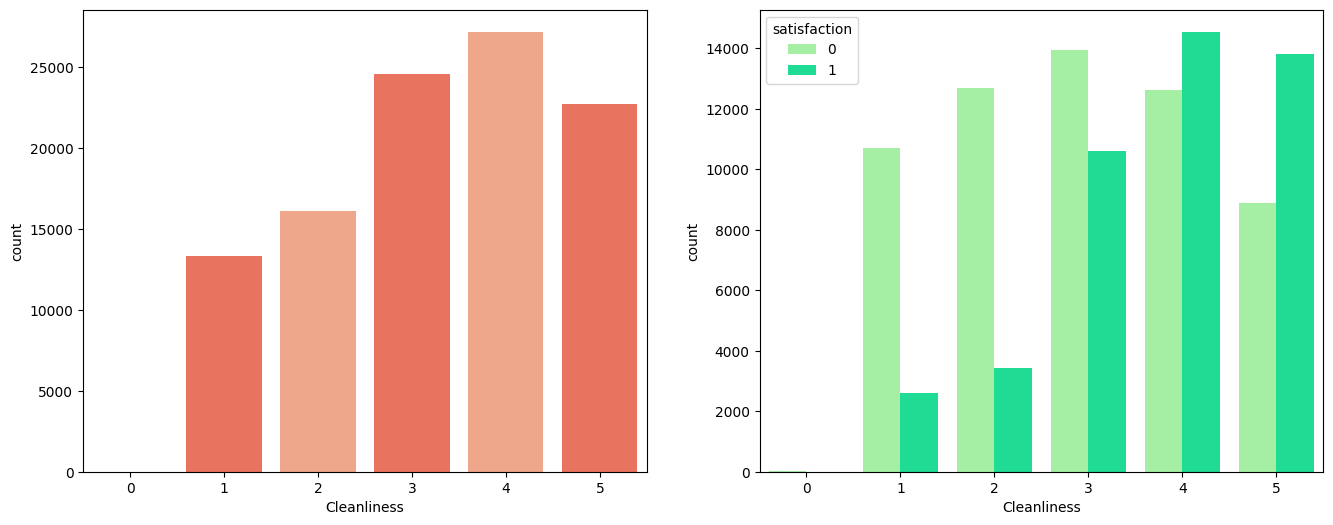

In [27]:
categories=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in categories:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=df_train[i],palette=["lightsalmon","tomato"])

  plt.subplot(1,2,2)
  sns.countplot(x=df_train[i],hue=df_train.satisfaction, palette=["palegreen","mediumspringgreen"])
  plt.show()

Female and male data amounts are close to each other. In the Customer Type feature, which is divided into two groups as Loyal customer and disloyal customer, the number of Loyal customers is more than the number of Disloyal customers. We can say that half of the Loyal customers are satisfied and half are neutral or dissatisfied. But in Disloyal customers, the number of satisfied passengers is less than the number of neutral or dissatisfied. Type of Travel feature consists of two categories as Personal and Business travel. It seems that the number of passengers making Business travel is higher than those making Personnel travel. While the number of satisfied passengers is higher in Business travel, the number of satisfied passengers is very low in Personal travel. Class features are divided into three categories: Eco, Business, and Eco Plus. While the number of passengers in the Business and Eco classes is close to each other, the number of passengers in the Eco Plus class is much less. While the majority of passengers in Business class are satisfied, the majority of passengers in Eco class are neutral or dissatisfied. In the other features, there are 6 categories from 1 to 5 (increasing satisfaction rates), while 0 represents unimplemented features. Neutral or dissatisfied passengers appear more in all categories of the Departure/Arrival time convenient feature. As we can predict for other features, neutral or dissatisfied passengers are more at low satisfaction levels like 0-1-2 at the beginning, while satisfied passengers are more at high satisfaction levels like 4-5.

### Delay according to Type of Travel

In [28]:
df_train['Total_Delay']= df_train['Departure Delay in Minutes']+ df_train['Arrival Delay in Minutes']

<Axes: xlabel='Type of Travel', ylabel='Total_Delay'>

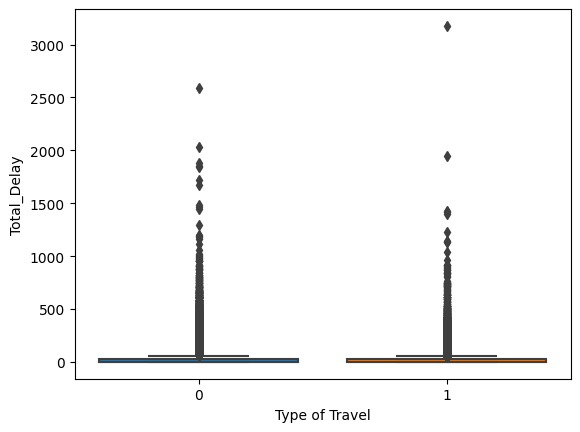

In [29]:
sns.boxplot(x='Type of Travel', y= 'Total_Delay', data = df_train)

Personal Travellers have experienced more delay compared to business travels.

## Feature Selection

In [30]:
sns.set(rc={'figure.figsize':(20,12.27)})

#### CHI SQUARE

In [31]:
categories = df_train.drop(['id','Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction','Total_Delay'],axis=1)

In [32]:
categories.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
90131,1,1,0,0,3,3,3,3,5,3,5,5,3,2,5,4,5,5
47865,0,0,0,0,2,2,2,2,3,5,4,5,5,5,5,3,5,5
44425,1,0,0,0,4,4,4,4,5,5,5,3,3,3,3,4,3,5
96450,1,0,0,0,2,2,2,2,4,4,5,5,5,5,5,3,5,4
72524,0,0,0,0,3,3,3,3,4,5,4,3,3,4,3,3,3,5


In [33]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
fs = SelectKBest(score_func=chi2, k=6)
fit = fs.fit(categories,df_train.satisfaction )

In [35]:
X_train_fs = fs.transform(categories)

In [36]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 7.862399
Feature 1: 2989.976064
Feature 2: 14445.748601
Feature 3: 13606.876336
Feature 4: 5422.333982
Feature 5: 210.260147
Feature 6: 2174.524945
Feature 7: 0.026502
Feature 8: 2527.913233
Feature 9: 14761.957221
Feature 10: 6419.260324
Feature 11: 8711.181948
Feature 12: 5299.337352
Feature 13: 5261.976617
Feature 14: 2448.815383
Feature 15: 2808.444759
Feature 16: 2362.946754
Feature 17: 5071.376389


#### Plot the Scores

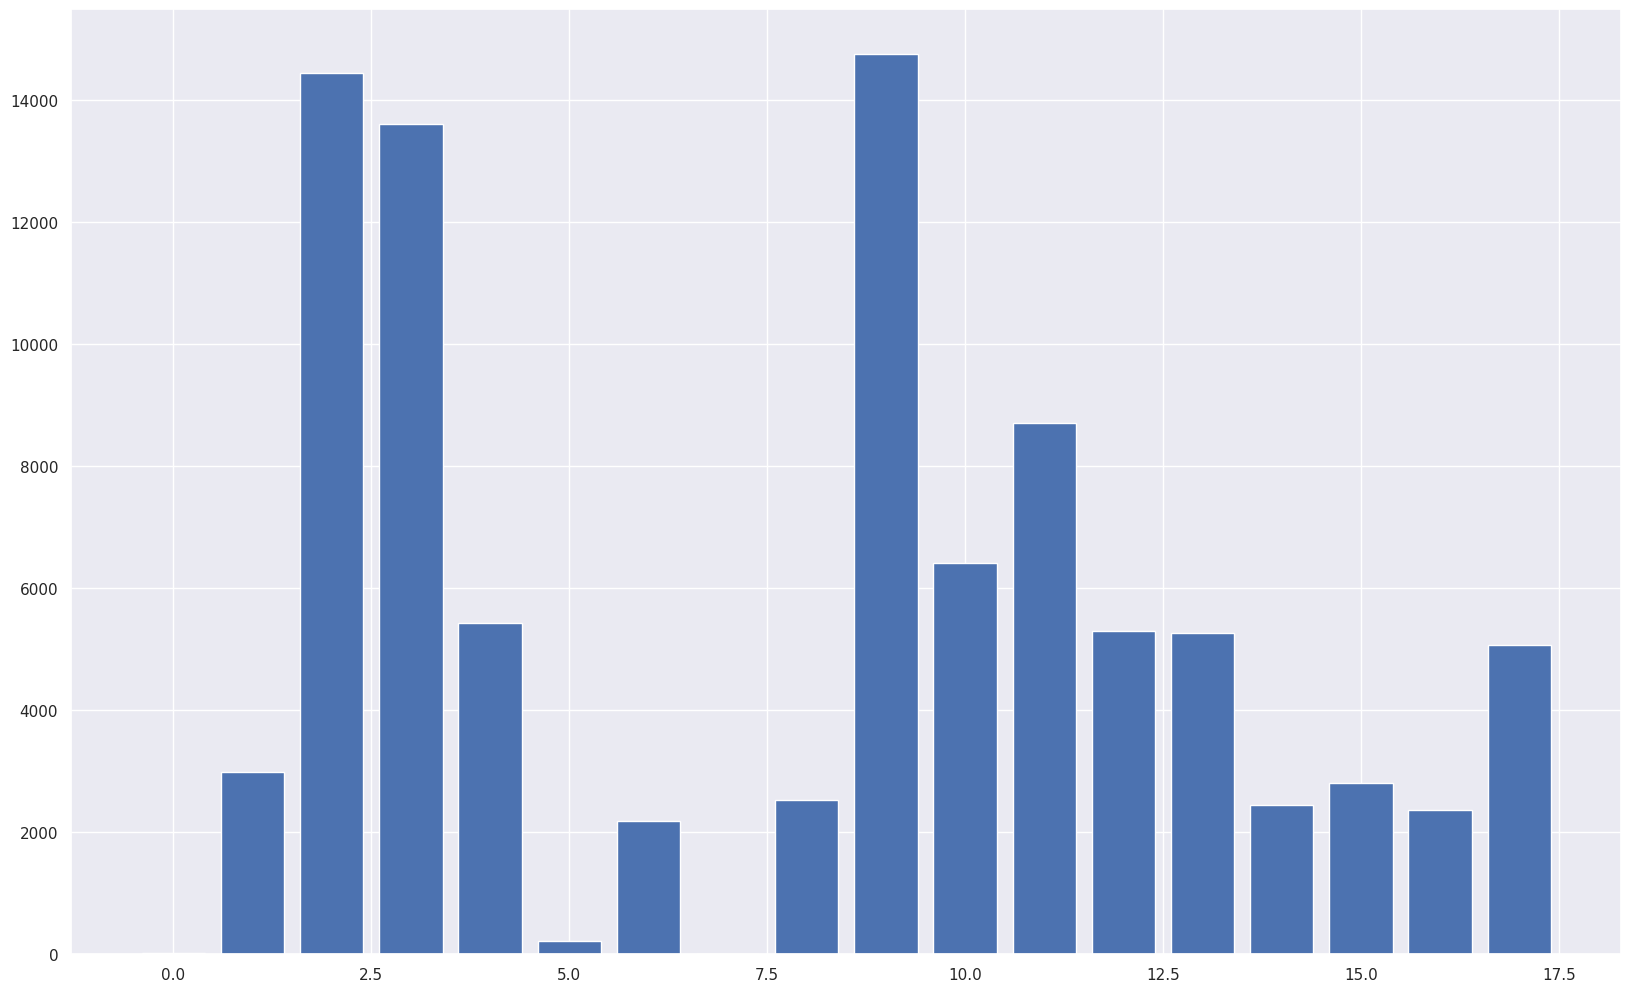

In [37]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [38]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(categories.columns)

#### Concat two dataframes for Better Visualization

In [39]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#### Naming the Dataframe Columns

In [40]:
featureScores.columns = ['Specs','Score']

In [41]:
featureScores

,Specs,Score
0,Gender,7.862399
1,Customer Type,2989.976064
2,Type of Travel,14445.748601
3,Class,13606.876336
4,Inflight wifi service,5422.333982
5,Departure/Arrival time convenient,210.260147
6,Ease of Online booking,2174.524945
7,Gate location,0.026502
8,Food and drink,2527.913233
9,Online boarding,14761.957221


#### Print 8 Best Features

In [42]:
print(featureScores.nlargest(8,'Score'))

                     Specs         Score
9          Online boarding  14761.957221
2           Type of Travel  14445.748601
3                    Class  13606.876336
11  Inflight entertainment   8711.181948
10            Seat comfort   6419.260324
4    Inflight wifi service   5422.333982
12        On-board service   5299.337352
13        Leg room service   5261.976617


#### Considering Numerical Variables

In [43]:
Num_Cols = df_train[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Total_Delay','satisfaction']]

In [44]:
Num_Cols.corr()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Total_Delay,satisfaction
Age,1.000000,0.099461,-0.010152,-0.012127,-0.011255,0.137167
Flight Distance,0.099461,1.000000,0.002158,-0.002423,-0.000146,0.298780
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.961161,0.990138,-0.050494
Arrival Delay in Minutes,-0.012127,-0.002423,0.961161,1.000000,0.990347,-0.057497
Total_Delay,-0.011255,-0.000146,0.990138,0.990347,1.000000,-0.054546
satisfaction,0.137167,0.298780,-0.050494,-0.057497,-0.054546,1.000000


<Axes: >

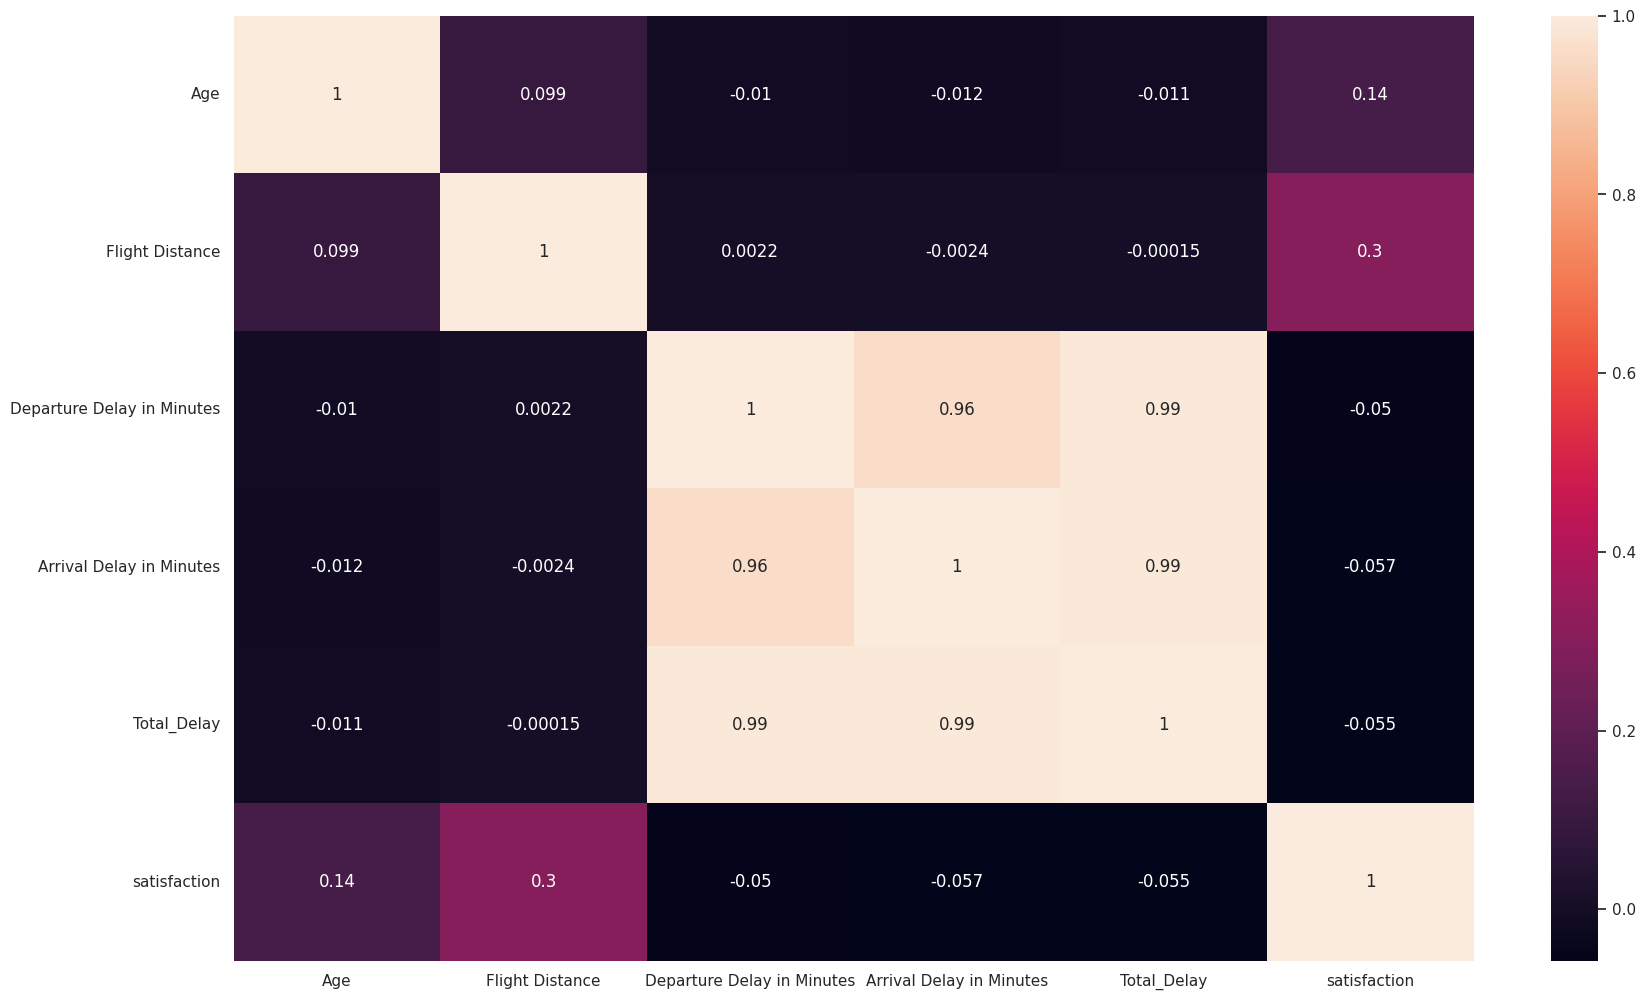

In [45]:
sns.heatmap(Num_Cols.corr(), annot = True)

##### Setting a benchamrk of 0.30 for correlation coefficient values. All the categorical features having a correlation coefficient above than 0.30 with the target variable 'satisfaction' will be considered for model training.

Flight distance will be considered as a feature, as it has a correlation coeeficent of 0.30.

## Feature Scaling

In [46]:
df_train['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

##### Flight Distance is in the range of 31 to 4983, and has a corelation of 0.30, it may affect the predicted outcomes so we need to normalize the values.

In [47]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df_train[["Flight Distance"]]=scale.fit_transform(df_train[["Flight Distance"]])

In [48]:
df_train[['Flight Distance']]

,Flight Distance
90131,-0.369504
47865,-0.369504
44425,-0.337413
96450,0.717602
72524,2.287087
...,...
97767,-0.854891
53459,-0.883974
32973,-0.854891
82052,-0.854891


### Creating a dataset with selected features

In [49]:
data_airline = df_train[['Flight Distance','Online boarding','Type of Travel','Leg room service','On-board service','Class','Seat comfort','Inflight entertainment','Inflight wifi service','satisfaction']]

In [50]:
data_airline.head()

,Flight Distance,Online boarding,Type of Travel,Leg room service,On-board service,Class,Seat comfort,Inflight entertainment,Inflight wifi service,satisfaction
90131,-0.369504,3,0,2,3,0,5,5,3,0
47865,-0.369504,5,0,5,5,0,4,5,2,1
44425,-0.337413,5,0,3,3,0,5,3,4,1
96450,0.717602,4,0,5,5,0,5,5,2,1
72524,2.287087,5,0,4,3,0,4,3,3,1


### Splitting the dataset with selected features

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = data_airline.drop('satisfaction', axis=1)
y = data_airline['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [53]:
X_train.shape

(69615, 9)

In [54]:
y_train.shape

(69615,)

In [55]:
X_test.shape

(34289, 9)

In [56]:
y_test.shape

(34289,)

## Logistic Regression

### Model Building

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
clf = LogisticRegression()

### Training the Model

In [59]:
clf.fit(X_train, y_train)

LogisticRegression()

### Predicting the Output

In [60]:
y_pred = clf.predict(X_test)

### Computing the Accuracy

In [61]:
from sklearn.metrics import accuracy_score

In [62]:

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 85.23%


### Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[17142  2284]
 [ 2779 12084]]


### Visualizing Confusion Matrix using Heatmap

<Figure size 2000x1227 with 0 Axes>

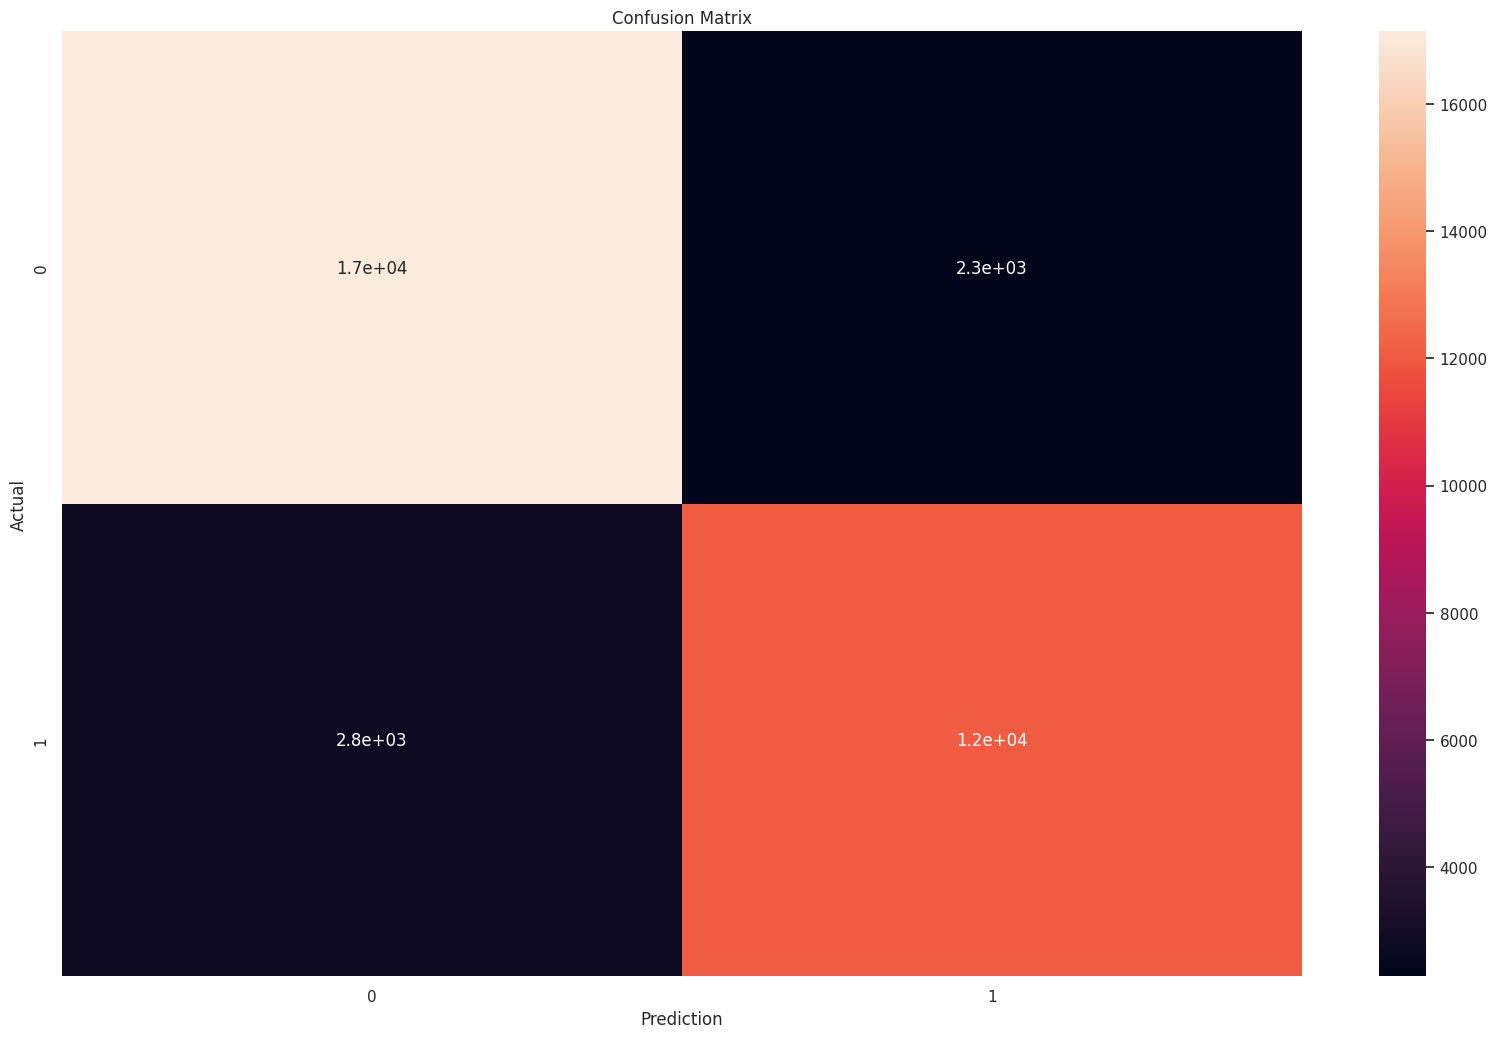

<Figure size 2000x1227 with 0 Axes>

In [64]:
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.figure()

### Confusion Matrix Evaluation Metrics

In [65]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 85.23433170987781
Precision: 84.10356347438753
Recall: 81.30256341250085


## Decision Tree

### Importing the libraries

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree
from sklearn.tree import plot_tree

### Modelling Tree and Testing

In [67]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


### Predicting the Values of Test Data

In [68]:
y_pred = dtree.predict(X_test)

### Classification Report

In [69]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     19426
           1       0.90      0.90      0.90     14863

    accuracy                           0.91     34289
   macro avg       0.91      0.91      0.91     34289
weighted avg       0.91      0.91      0.91     34289



### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.9108752077925866')

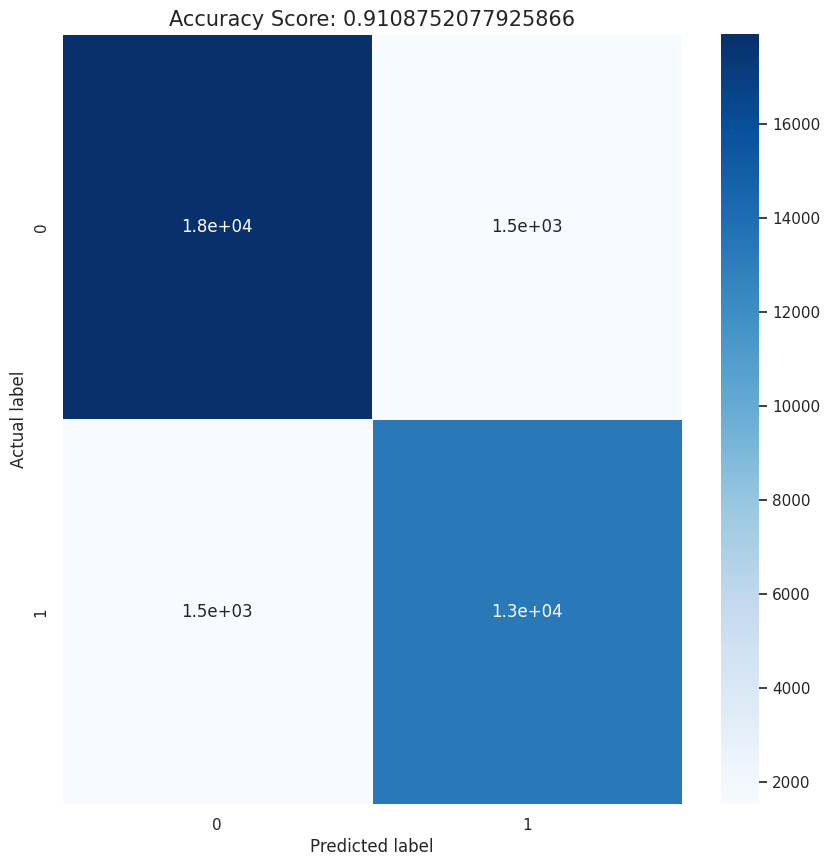

In [70]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

### Accuracy

In [71]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 91.08752077925865
Precision: 89.74082800403905
Recall: 89.69252506223509


##### Using Classifier Criterias such as Entropy and Gini to find best accuracy

In [72]:
#Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(criterion='entropy')

#Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
"______________________"

clfG = tree.DecisionTreeClassifier(criterion='gini')

#Train Decision Tree Classifer
clfG = clfG.fit(X_train,y_train)

#Predict the response for test dataset
y_predG= clfG.predict(X_test)

### Confusion Matrix

In [73]:
conf_matDt=confusion_matrix(y_test,y_pred)
conf_matDt

array([[17919,  1507],
       [ 1469, 13394]])

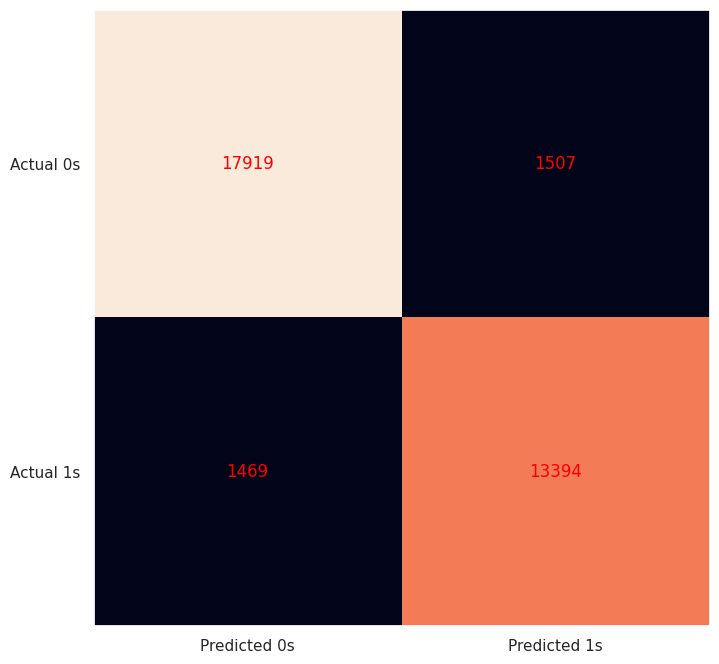

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matDt)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matDt[i, j], ha='center', va='center', color='red')
plt.show()

### Accuracy Evaluation

In [75]:
from sklearn.metrics import accuracy_score
Dt_accuracyE=(accuracy_score(y_test, y_pred))*100
Dt_accuracyG=(accuracy_score(y_test, y_predG))*100
#print('Criterion=entropy', accuracy_score(y_test, y_pred))
#print('Criterion=gini', accuracy_score(y_test, y_predG))
print("Accuracy using Entropy:",Dt_accuracyE,"%")
print("Accuracy using Gini:",Dt_accuracyG,"%")

Accuracy using Entropy: 91.32083175362361 %
Accuracy using Gini: 91.1370993613112 %


## KNN

### Model Building

In [76]:

from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)

### Training the Model

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Predict the Output

In [79]:
y_pred = knn.predict(X_test)

### Confusion Matrix

In [80]:
conf_matKNN=confusion_matrix(y_test, y_pred)
conf_matKNN

array([[18412,  1014],
       [ 1524, 13339]])

### Visualising Confusion Matrix using Heatmap

<Figure size 2000x1227 with 0 Axes>

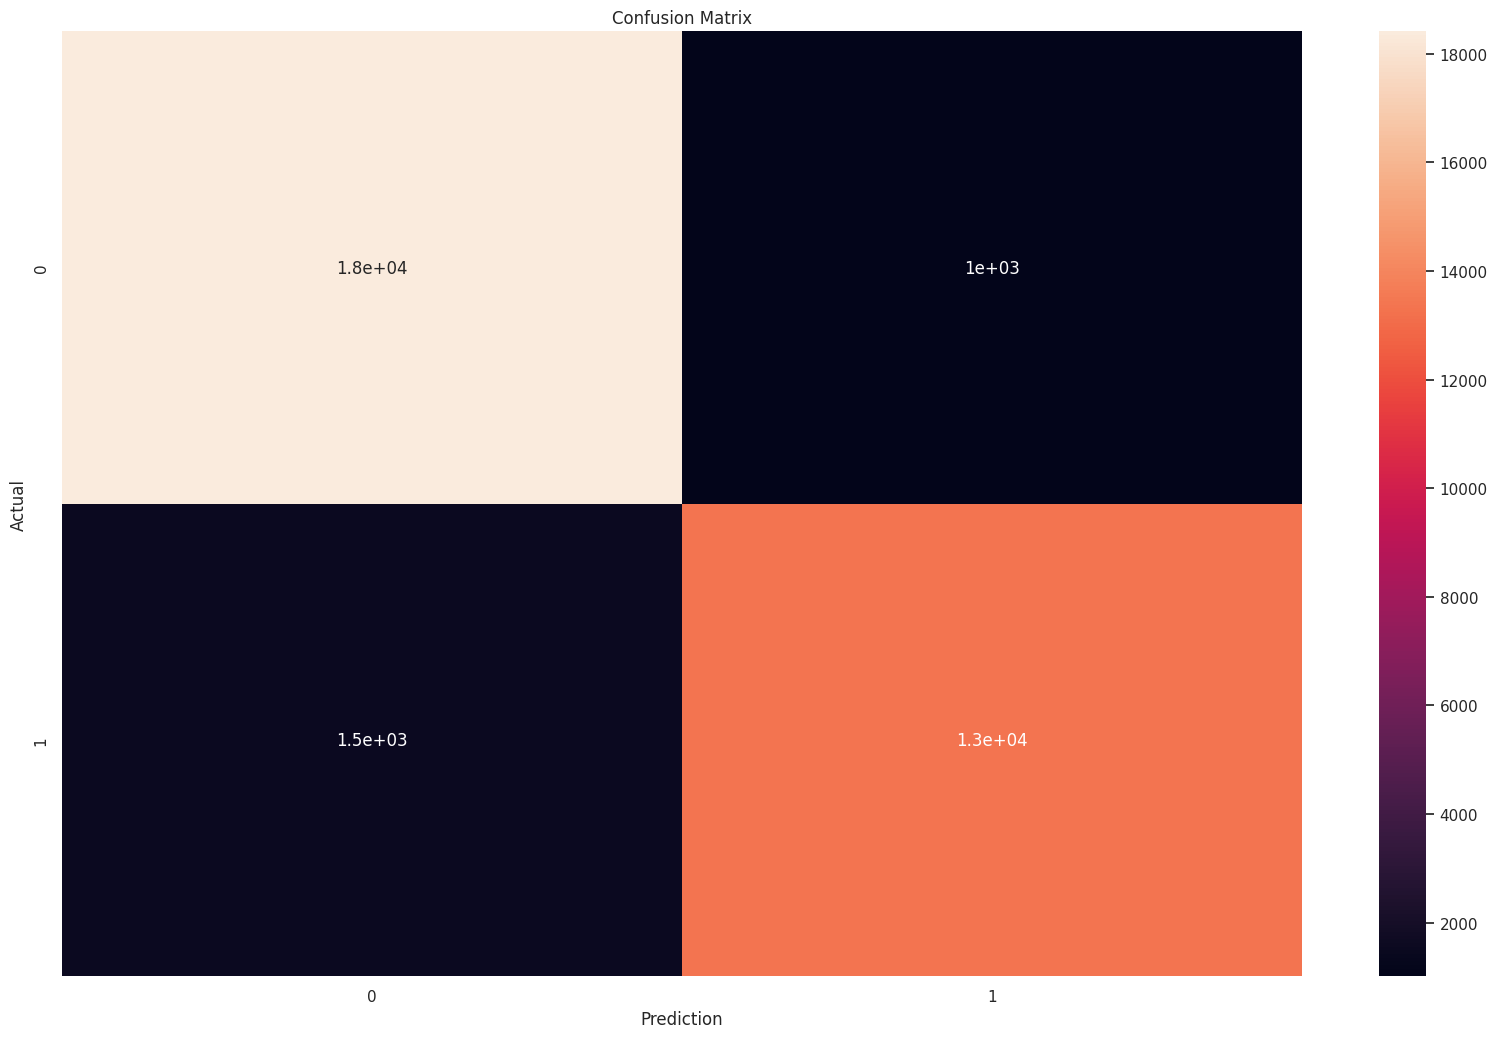

<Figure size 2000x1227 with 0 Axes>

In [81]:
sns.heatmap(conf_matKNN, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.figure()

### Classification Report

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     19426
           1       0.93      0.90      0.91     14863

    accuracy                           0.93     34289
   macro avg       0.93      0.92      0.92     34289
weighted avg       0.93      0.93      0.93     34289



### Confusion Matrix Evaluation Metrics

In [83]:
from sklearn import metrics
Knn_acc = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 92.59820933827176
Precision: 92.93527485543092
Recall: 89.74634999663594


## Conclusion

In [84]:
Models = ['KNN','Decision Tree','Logistic Regression']
Scores = [Knn_acc,Dt_accuracyE,accuracy]

<Axes: >

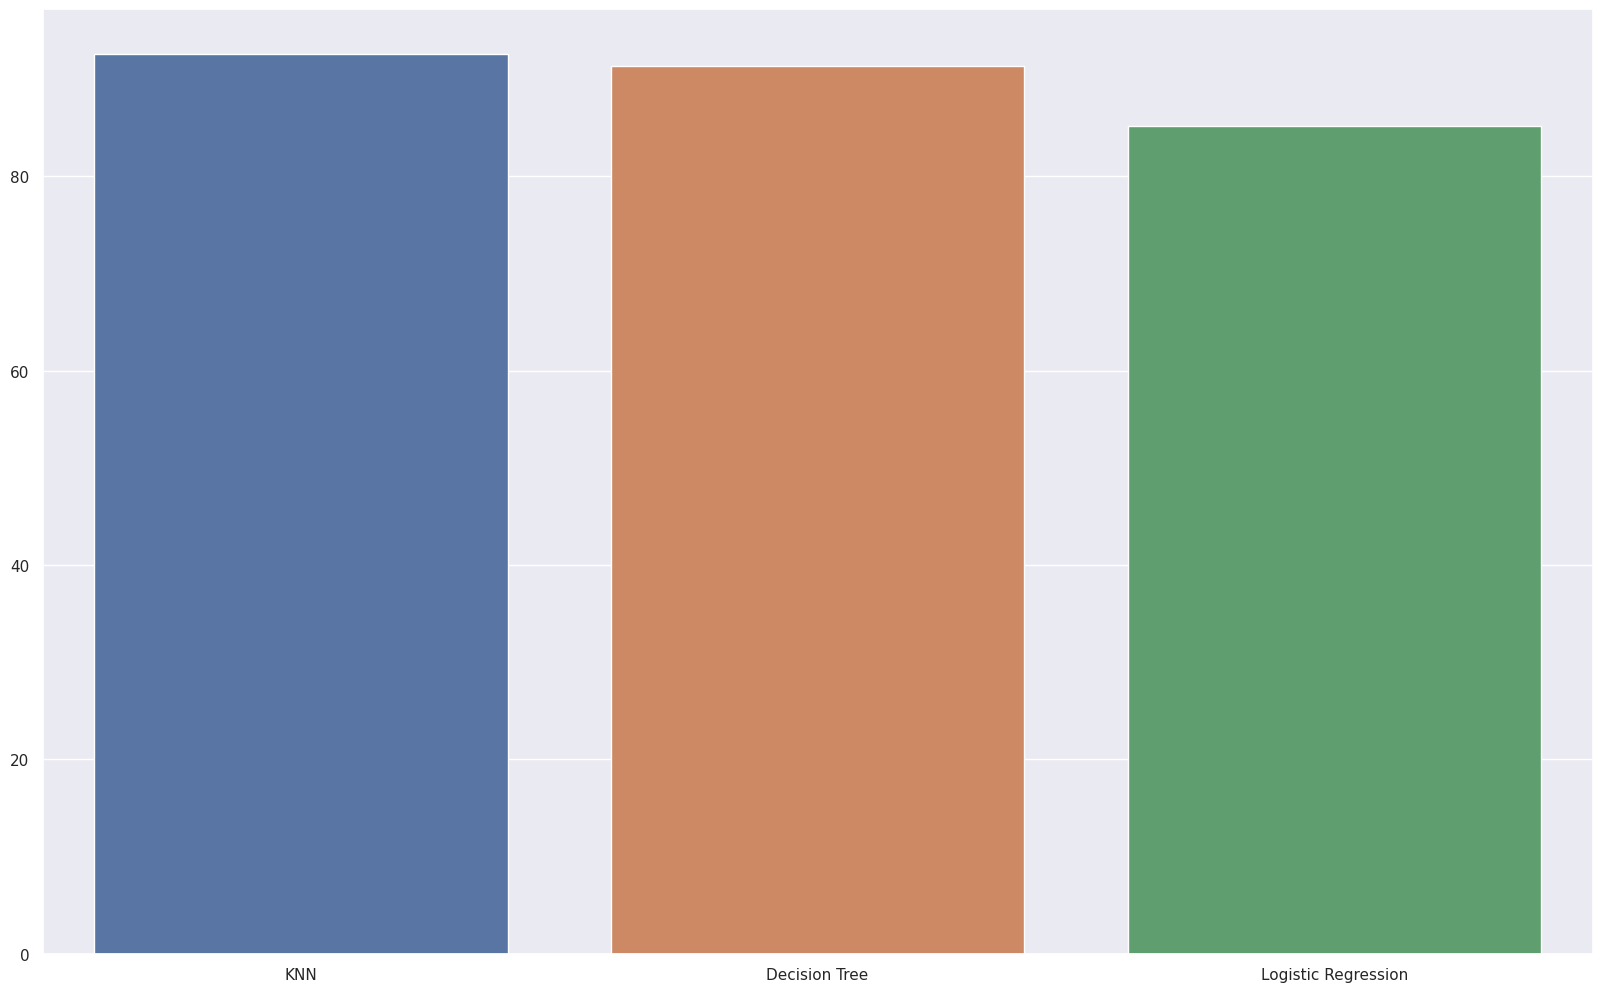

In [85]:
sns.barplot(x = Models,
            y = Scores)

### In the overall comparison we can conclude that the KNN model performed the best with an accuracy greater than 92%.
### Followed by the decision tree with an accuracy greater than 91%.
### The least accurate model was the logisitic regression.


#### It would be more meaningful if the data were divided into 3 groups as satisfied, neutral and dissatisfied passengers. It was difficult to draw meaningful conclusions as the inclusion of neutral passengers in the dissatisfied group increased the dissatisfaction rate for all services.
#### By looking at the visualizations and feature importances of model; services that affect satisfaction the most are Online boarding, Inflight wifi service, Inflight entertainment, Seat comfort, Cleanliness, and On board service.
#### Gender has no obvious effect on overall satisfaction and scores.
#### Passengers whose age is between 40 to 51 are more likely to be satisfied.
#### The majority of personal travel passengers are not satisfied, incentive campaigns can be organized for them.
#### While the business class passengers are generally satisfied, the majority of the eco class passengers are not. Extra services can be added for eco class.

